RADITYA KAMA CAHYADEWA

5240411098

STRUKTUR DATA B

Dosen Pengampu -> Dr. Donny Avianto, S.T., M.T.

---------------------------------------------------------------------------

TA STRUKTUR DATA STUDI KASUS

MENU 1.1 – Input Data Stok Barang
------------------------------------
1. Data disimpan dalam struktur data Binary Search Tree (BST).
2. Atribut data:
   - No. SKU (4 digit angka, unik)
   - Nama Barang
   - Harga Satuan
   - Jumlah Stok
3. Proses insert berdasarkan No. SKU.
4. User menginput seluruh atribut via keyboard.
5. Sistem mengecek apakah No. SKU sudah ada di BST:
   - Jika SUDAH ADA → input ditolak.
   - Jika BELUM ADA → data disimpan ke BST.

MENU 1.2 – Restok Barang
------------------------------------
1. User memasukkan No. SKU via keyboard.
2. Sistem mengecek apakah No. SKU ada di BST:
   - Jika SUDAH ADA → user memasukkan jumlah stok baru.
     - Total Stok = Stok Lama + Stok Baru.
     - Sistem update jumlah stok barang tersebut.
   - Jika BELUM ADA → sistem menolak dan menyarankan input data stok dahulu.

MENU 2.1 – Input Data Transaksi Baru
------------------------------------
1. Data disimpan dalam struktur Array/List.
2. Atribut data transaksi:
   - Nama Konsumen
   - No. SKU barang
   - Jumlah Beli
   - Subtotal = Harga Satuan × Jumlah Beli
3. User menginput:
   - Nama Konsumen (satu kali di awal)
   - No. SKU barang
   - Jumlah Beli
4. Sistem mengecek SKU:
   - Jika SKU TIDAK TERDAFTAR:
     - Tampilkan pesan: "No. SKU belum terdaftar"
     - Tanyakan "Lanjutkan transaksi? (Y/N)"
       - Y → ulangi input SKU
       - N → kembali ke sub menu
   - Jika SKU TERDAFTAR:
     - Minta input jumlah beli
     - Cek stok:
       - Jika stok mencukupi:
         - Kurangi stok: Stok Baru = Stok Lama - Jumlah Beli
         - Simpan transaksi ke Array
         - Tampilkan: “Data Transaksi Konsumen Berhasil Diinputkan”
         - Tanyakan “Tambah pembelian untuk konsumen ini? (Y/N)”
           - Y → input SKU baru untuk konsumen yang sama
           - N → kembali ke sub menu
       - Jika stok kurang:
         - Tampilkan pesan: “Jumlah stok tidak mencukupi”
         - Tanyakan “Lanjutkan transaksi? (Y/N)”
           - Y → ulangi input jumlah beli
           - N → kembali ke sub menu

MENU 2.2 – Lihat Data Seluruh Transaksi Konsumen
------------------------------------
1. Menampilkan seluruh data transaksi dalam Array.
2. Data ditampilkan:
   - Nama Konsumen
   - No. SKU barang
   - Jumlah Beli
   - Subtotal
3. Setelah ditampilkan → kembali ke sub menu.

MENU 2.3 – Lihat Data Transaksi Berdasarkan Subtotal
------------------------------------
1. Menampilkan data transaksi diurutkan berdasarkan nilai Subtotal.
2. Urutan: dari Subtotal terbesar ke terkecil.
3. Atribut yang ditampilkan:
   - Nama Konsumen
   - No. SKU barang
   - Jumlah Beli
   - Subtotal
4. Metode pengurutan dapat menggunakan salah satu dari:
   - Bubble Sort / Insertion Sort / Selection Sort / Merge Sort / Quick Sort


Diagram Jenjang:
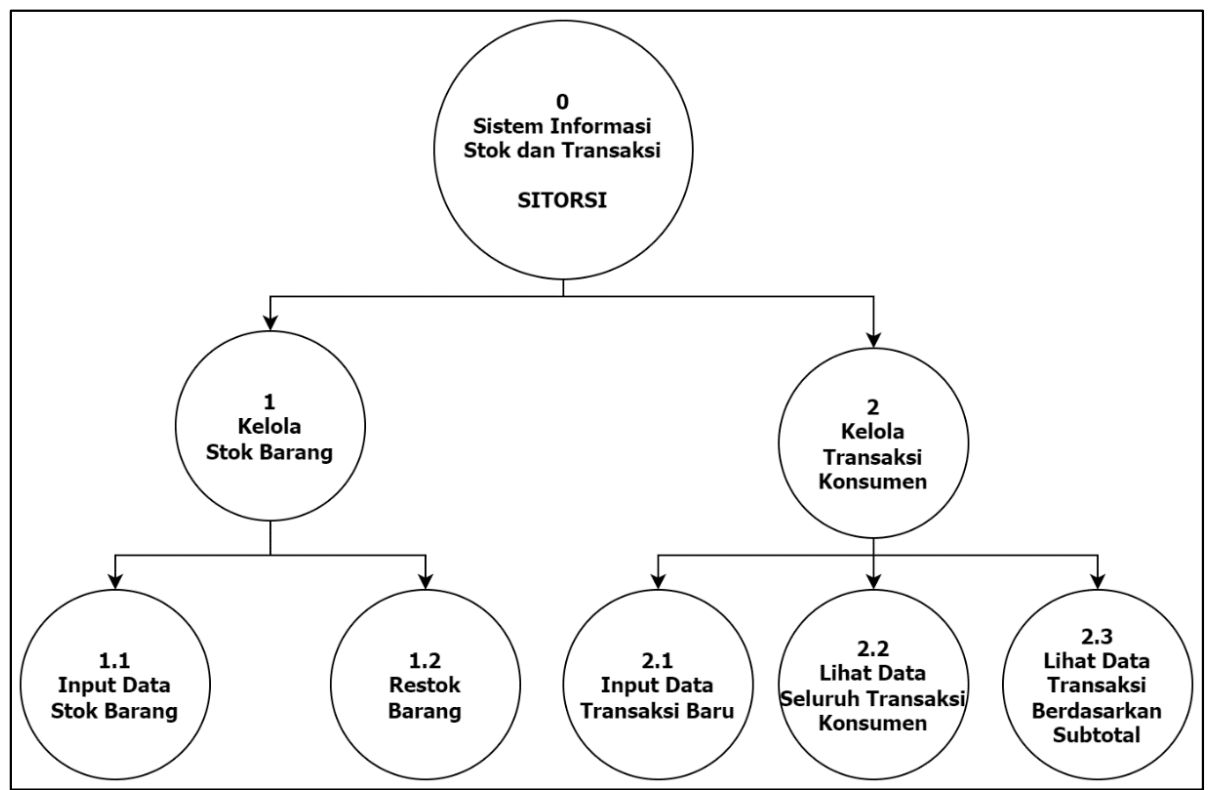

---------------------------------------------------------------------------

In [ ]:
class Node:
    def __init__(self, sku, nama, harga, jumlah):
        self.sku = sku
        self.nama = nama
        self.harga = harga
        self.jumlah = jumlah
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, sku, nama, harga, jumlah):
        if self.root is None:
            self.root = Node(sku, nama, harga, jumlah)
            print("Barang berhasil ditambahkan ke stok.")
        else:
            self._insert(self.root, sku, nama, harga, jumlah)

    def _insert(self, current, sku, nama, harga, jumlah):
        if sku == current.sku:
            print("Gagal! SKU sudah terdaftar di stok!")
        elif sku < current.sku:
            if current.left:
                self._insert(current.left, sku, nama, harga, jumlah)
            else:
                current.left = Node(sku, nama, harga, jumlah)
                print("Barang berhasil ditambahkan ke stok.")
        else:
            if current.right:
                self._insert(current.right, sku, nama, harga, jumlah)
            else:
                current.right = Node(sku, nama, harga, jumlah)
                print("Barang berhasil ditambahkan ke stok.")

    def search(self, sku):
        return self._search(self.root, sku)

    def _search(self, current, sku):
        if current is None:
            return None
        if sku == current.sku:
            return current
        elif sku < current.sku:
            return self._search(current.left, sku)
        else:
            return self._search(current.right, sku)

def input_data_stok(BST):
    sku = input("Masukkan No. SKU (4 digit): ")
    if len(sku) != 4 or not sku.isdigit():
        print("No. SKU harus terdiri dari 4 digit angka.")
        return
    if BST.search(sku):
        print("SKU sudah ada! Gunakan menu restok untuk menambah stok barang!")
        return
    try:
        nama = input("Masukkan Nama Barang: ")
        harga = float(input("Masukkan Harga Satuan: "))
        jumlah = int(input("Masukkan Jumlah Stok: "))
        if harga < 0 or jumlah < 0:
            print("Harga dan jumlah stok tidak boleh negatif.")
            return
        BST.insert(sku, nama, harga, jumlah)
    except ValueError:
        print("Input tidak valid! Pastikan angka dimasukkan dengan benar!")

def restok_barang(BST):
    sku = input("Masukkan No. SKU untuk restok: ")
    if len(sku) != 4 or not sku.isdigit():
        print("No. SKU harus terdiri dari 4 digit angka.")
        return
    node = BST.search(sku)
    if node:
        print(f"Barang ditemukan: {node.nama}")
        print(f"Jumlah stok saat ini: {node.jumlah}")
        try:
            stok_baru = int(input("Masukkan jumlah stok baru yang akan ditambahkan: "))
            if stok_baru < 0:
                print("Jumlah stok tidak boleh negatif!")
                return
            node.jumlah += stok_baru
            print(f"Restok berhasil. Jumlah stok sekarang: {node.jumlah}")
        except ValueError:
            print("Input tidak valid! Masukkan angka yang benar!")
    else:
        print("No. SKU tidak ditemukan! Silakan input data stok barang terlebih dahulu!")

def input_transaksi_baru(BST, daftar_transaksi):
    nama_konsumen = input("Masukkan Nama Konsumen: ")
    while True:
        sku = input("Masukkan No. SKU barang yang dibeli: ")
        if len(sku) != 4 or not sku.isdigit():
            print("No. SKU harus 4 digit.")
            continue
        barang = BST.search(sku)
        if not barang:
            print("No. SKU yang diinputkan belum terdaftar")
            lanjut = input("Apakah ingin melanjutkan transaksi? (Y/N): ").strip().upper()
            if lanjut != "Y":
                break
            continue
        print(f"Barang ditemukan: {barang.nama} - Harga: {barang.harga} - Stok: {barang.jumlah}")
        try:
            jumlah = int(input("Masukkan jumlah barang yang dibeli: "))
            if jumlah <= 0:
                print("Jumlah beli harus lebih dari 0.")
                continue
            if barang.jumlah >= jumlah:
                barang.jumlah -= jumlah
                subtotal = barang.harga * jumlah
                transaksi = {
                    "nama": nama_konsumen,
                    "sku": sku,
                    "jumlah": jumlah,
                    "subtotal": subtotal
                }
                daftar_transaksi.append(transaksi)
                print("Data Transaksi Konsumen Berhasil Diinputkan")
                tambah = input("Apakah ingin menambahkan data pembelian untuk konsumen ini? (Y/N): ").strip().upper()
                if tambah != "Y":
                    break
            else:
                print("Jumlah Stok No.SKU yang Anda beli tidak mencukupi")
                lanjut = input("Apakah ingin melanjutkan transaksi? (Y/N): ").strip().upper()
                if lanjut == "N":
                    break
        except ValueError:
            print("Input tidak valid. Pastikan angka dimasukkan dengan benar.")

def tampilkan_seluruh_transaksi(daftar_transaksi):
    if not daftar_transaksi:
        print("Belum ada data transaksi yang tersimpan.")
    else:
        print("\nData Seluruh Transaksi Konsumen:")
        for i, transaksi in enumerate(daftar_transaksi, start=1):
            print(f"{i}. Nama Konsumen : {transaksi['nama']}")
            print(f"   No. SKU      : {transaksi['sku']}")
            print(f"   Jumlah Beli  : {transaksi['jumlah']}")
            print(f"   Subtotal     : Rp{transaksi['subtotal']:,.2f}".replace(",", ".").replace(".", ",", 1))
            print("-" * 40)

def insertion_sort_transaksi_descending(transaksi_list):
    for i in range(1, len(transaksi_list)):
        key = transaksi_list[i]
        j = i - 1
        while j >= 0 and transaksi_list[j]['subtotal'] < key['subtotal']:
            transaksi_list[j + 1] = transaksi_list[j]
            j -= 1
        transaksi_list[j + 1] = key

def tampilkan_transaksi_urut_subtotal(daftar_transaksi):
    if not daftar_transaksi:
        print("Belum ada data transaksi yang tersimpan.")
        return
    insertion_sort_transaksi_descending(daftar_transaksi)
    print("\nData Transaksi Konsumen (Urut Subtotal Descending):")
    for i, transaksi in enumerate(daftar_transaksi, start=1):
        print(f"{i}. Nama Konsumen : {transaksi['nama']}")
        print(f"   No. SKU      : {transaksi['sku']}")
        print(f"   Jumlah Beli  : {transaksi['jumlah']}")
        print(f"   Subtotal     : Rp{transaksi['subtotal']:,.2f}".replace(",", ".").replace(".", ",", 1))
        print("-" * 40)

if __name__ == "__main__":
    BST = BinarySearchTree()
    daftar_transaksi = []
    while True:
        print("\nMENU UTAMA")
        print("1. Kelola Stok Barang")
        print("2. Kelola Transaksi Konsumen")
        print("0. Exit Program")
        pilih = input("Pilih menu: ")
        if pilih == "1":
            while True:
                print("\nKelola Stok Barang")
                print("1. Input Data Stok Barang")
                print("2. Restok Barang")
                print("0. Kembali ke Menu Utama")
                sub_pilih = input("Pilih menu: ")
                if sub_pilih == "1":
                    input_data_stok(BST)
                elif sub_pilih == "2":
                    restok_barang(BST)
                elif sub_pilih == "0":
                    break
                else:
                    print("Pilihan tidak valid.")
        elif pilih == "2":
            while True:
                print("\nKelola Transaksi Konsumen")
                print("1. Input Data Transaksi Baru")
                print("2. Lihat Data Seluruh Transaksi Konsumen")
                print("3. Lihat Data Transaksi Berdasarkan Subtotal")
                print("0. Kembali ke Menu Utama")
                sub_pilih = input("Pilih menu: ")
                if sub_pilih == "1":
                    input_transaksi_baru(BST, daftar_transaksi)
                elif sub_pilih == "2":
                    tampilkan_seluruh_transaksi(daftar_transaksi)
                elif sub_pilih == "3":
                    tampilkan_transaksi_urut_subtotal(daftar_transaksi)
                elif sub_pilih == "0":
                    break
                else:
                    print("Pilihan tidak valid.")
        elif pilih == "0":
            print("Terima kasih telah menggunakan program. Sampai jumpa!")
            break
        else:
            print("Pilihan tidak valid.")



MENU UTAMA
1. Kelola Stok Barang
2. Kelola Transaksi Konsumen
0. Exit Program
Pilih menu: 1

Kelola Stok Barang
1. Input Data Stok Barang
2. Restok Barang
0. Kembali ke Menu Utama
Pilih menu: 1
Masukkan No. SKU (4 digit): 0001
Masukkan Nama Barang: Bamboe Roencing Tadjam
Masukkan Harga Satuan: 100000
Masukkan Jumlah Stok: 1000
Barang berhasil ditambahkan ke stok.

Kelola Stok Barang
1. Input Data Stok Barang
2. Restok Barang
0. Kembali ke Menu Utama
Pilih menu: 1
Masukkan No. SKU (4 digit): 0002
Masukkan Nama Barang: Kopi Luwak Beranak
Masukkan Harga Satuan: 30000
Masukkan Jumlah Stok: 1000
Barang berhasil ditambahkan ke stok.

Kelola Stok Barang
1. Input Data Stok Barang
2. Restok Barang
0. Kembali ke Menu Utama
Pilih menu: 1
Masukkan No. SKU (4 digit): 0003
Masukkan Nama Barang: JozJiz
Masukkan Harga Satuan: 1000
Masukkan Jumlah Stok: 100000
Barang berhasil ditambahkan ke stok.

Kelola Stok Barang
1. Input Data Stok Barang
2. Restok Barang
0. Kembali ke Menu Utama
Pilih menu: 1
Masu

---------------------------------------------------------------------------

Penjelasan setiap fungsi:

*italicized text*
**class node** -> Membuat node untuk setiap barang di BST (Binary Search Tree), menyimpan sku, nama, harga, jumlah, serta pointer ke left dan right node.

**class BinarySearchTree** -> Struktur data pohon biner untuk menyimpan data stok barang berdasarkan SKU secara terurut.

**insert()** -> Menambahkan data barang baru ke BST. Jika SKU sudah ada, akan ditolak.

**_insert()** -> Fungsi rekursif internal untuk menyisipkan node baru ke posisi yang tepat di BST.

**search()** -> Mencari barang berdasarkan SKU di dalam BST.

**_search()** -> Fungsi rekursif internal untuk pencarian node pada BST berdasarkan SKU.

**input_data_stok()** -> Meminta user memasukkan data barang baru (SKU, nama, harga, jumlah), lalu menyimpannya ke BST. Validasi dilakukan agar SKU 4 digit dan data valid.

**restok_barang()** -> Menambahkan jumlah stok ke barang yang sudah ada berdasarkan SKU. Menampilkan stok awal dan stok setelah ditambah.

**input_transaksi_baru()** -> Memproses transaksi pembelian oleh konsumen: mengecek SKU, menghitung subtotal, dan menyimpan transaksi ke array daftar_transaksi.

**tampilkan_seluruh_transaksi()** -> Menampilkan seluruh data transaksi konsumen dalam urutan input awal.

**insertion_sort_transaksi_descending()** -> Mengurutkan daftar_transaksi berdasarkan nilai subtotal dari yang paling besar ke paling kecil dengan metode insertion sort.

**tampilkan_transaksi_urut_subtotal()** -> Menampilkan data transaksi yang telah diurut berdasarkan subtotal secara menurun.

**if __name__ == "__main__":** -> Blok utama program. Menampilkan menu utama dan memanggil sub-menu berdasarkan pilihan user.

**print("MENU UTAMA") dan seterusnya** -> Menampilkan tampilan menu utama dan sub-menu secara berulang hingga user memilih keluar (0).

---------------------------------------------------------------------------

Penjelasan setiap kode:

**class Node:** -> Mendefinisikan struktur data untuk node pohon BST, mewakili satu barang.

**def __init__(self, sku, nama, harga, jumlah):** -> Konstruktor node untuk menyimpan SKU, nama, harga satuan, jumlah stok, serta pointer ke kiri dan kanan.

**class BinarySearchTree:** -> Kelas BST untuk menyimpan data stok barang dengan struktur pohon berdasarkan SKU.

**def __init__(self):** -> Membuat BST kosong dengan root bernilai None.

**insert(sku, nama, harga, jumlah)** -> Memasukkan barang baru ke BST berdasarkan SKU. Jika root kosong, masukkan sebagai root.

**_insert(current, ...)** -> Fungsi rekursif untuk mencari tempat yang sesuai di pohon berdasarkan SKU.

**search(sku)** -> Fungsi utama untuk mencari node berdasarkan SKU.

**_search(current, sku)** -> Fungsi rekursif pencarian node BST berdasarkan nilai SKU.

**input_data_stok(BST)** -> Fungsi untuk input data barang baru dari pengguna. Validasi dilakukan agar SKU 4 digit dan belum terdaftar.

**if len(sku) != 4 or not sku.isdigit():** -> Validasi bahwa SKU terdiri dari 4 digit dan hanya angka.

**BST.insert(...)** -> Menyisipkan barang ke BST bila data valid dan belum ada.

**restok_barang(BST)** -> Menambah jumlah stok pada barang yang sudah ada berdasarkan SKU.

**node = BST.search(sku)** -> Mencari node berdasarkan SKU, jika ditemukan maka stok akan ditambah.

**input_transaksi_baru(BST, daftar_transaksi)** -> Memproses transaksi dari konsumen. Validasi SKU, cek stok cukup, kurangi stok, lalu catat transaksi.

**barang.jumlah -= jumlah** -> Kurangi stok barang setelah transaksi berhasil.

**transaksi = {...}** -> Buat dictionary data transaksi: nama konsumen, SKU, jumlah beli, dan subtotal.

**daftar_transaksi.append(...)** -> Simpan transaksi ke dalam list transaksi.

**tampilkan_seluruh_transaksi(daftar_transaksi)** -> Menampilkan semua transaksi konsumen sesuai urutan input.

**insertion_sort_transaksi_descending(...)** -> Mengurutkan daftar transaksi berdasarkan subtotal dari yang tertinggi ke terendah menggunakan insertion sort.

**tampilkan_transaksi_urut_subtotal(...)** -> Tampilkan transaksi yang sudah diurutkan berdasarkan subtotal.

**if __name__ == "__main__":** -> Blok utama program yang memunculkan menu dan menerima input pengguna.

**while True:** -> Loop utama program agar menu terus ditampilkan sampai user memilih keluar.

**print("MENU UTAMA")** -> Tampilkan pilihan menu utama ke layar.

**if pilih == "1"** -> Akses ke sub-menu pengelolaan stok barang.

**if pilih == "2"** -> Akses ke sub-menu transaksi konsumen.

**if pilih == "0"** -> Keluar dari program dengan pesan perpisahan.

**elif ...** -> Menangani input yang tidak valid di setiap menu.

---------------------------------------------------------------------------

Terima Kasih!